# DATA EXPLORATION  

## Exploratory Data Analysis and Implications for the Modeling Strategy  

The conducted exploratory data analysis has highlighted key considerations essential for defining an effective modeling approach:  

- **Encoding of non-ordinal categorical features**: The presence of categorical variables with no inherent order necessitates **one-hot encoding** to ensure proper numerical representation. This transformation enables the model to distinguish categories without introducing artificial ordinal relationships.  

- **Balanced class distribution in binary classification**: Unlike scenarios where class imbalance requires remediation through methods such as **SMOTE or undersampling**, the distribution between classes is naturally balanced. As a result, the model can be trained directly on the original samples without the need for additional balancing techniques. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('../data/raw/Acoustic_Extinguisher_Fire_Dataset.xlsx')

In [3]:
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [4]:
data.tail()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0
17441,7,lpg,190,72,0.0,1,0


In [5]:
data.shape

(17442, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [7]:
data.columns.tolist()

['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY', 'STATUS']

In [8]:
data.nunique()

SIZE           7
FUEL           4
DISTANCE      19
DESIBEL       39
AIRFLOW      127
FREQUENCY     54
STATUS         2
dtype: int64

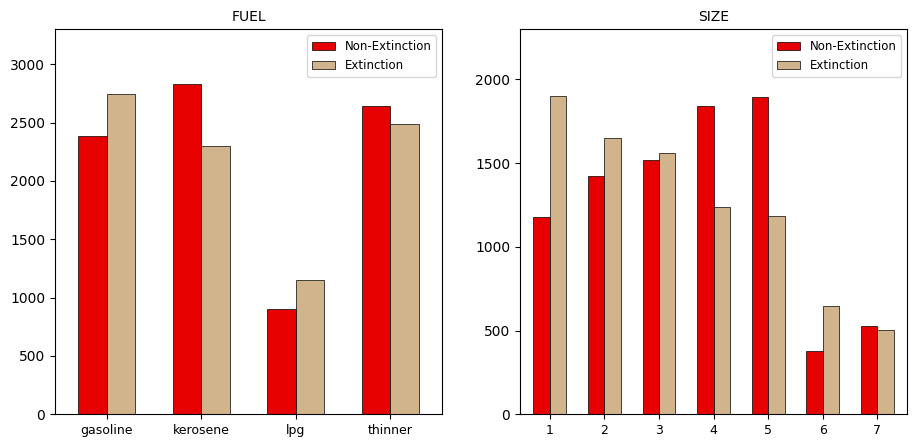

In [9]:
fuel_counts = data.groupby(["FUEL", "STATUS"]).size().unstack(fill_value=0)
size_counts = data.groupby(["SIZE", "STATUS"]).size().unstack(fill_value=0)


fig, axes = plt.subplots(1, 2, figsize=(11,5))


colors = ['#E60000', '#D2B48C']
status_labels = {0: "Non-Extinction", 1: "Extinction"}


fuel_counts.plot(kind="bar", stacked=False, color=colors, ax=axes[0], edgecolor="black", linewidth=0.5, width = 0.6)
axes[0].set_xlabel("")
axes[0].set_title("FUEL", fontsize = 10)
axes[0].set_xticks(range(len(fuel_counts.index)))
axes[0].set_xticklabels(fuel_counts.index, rotation=0, fontsize = 9)
axes[0].set_ylim(0,3300)


size_counts.plot(kind="bar", stacked=False, color=colors, ax=axes[1], edgecolor="black", linewidth=0.5, width = 0.6)
axes[1].set_xlabel("")
axes[1].set_title("SIZE", fontsize = 10)
axes[1].set_xticks(range(len(size_counts.index)))
axes[1].set_xticklabels(size_counts.index, rotation=0, fontsize = 9)
axes[1].set_ylim(0,2300)


handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, [status_labels.get(int(label), label) for label in labels], fontsize = 8.5)
axes[1].legend(handles, [status_labels.get(int(label), label) for label in labels], fontsize= 8.5)

plt.show()

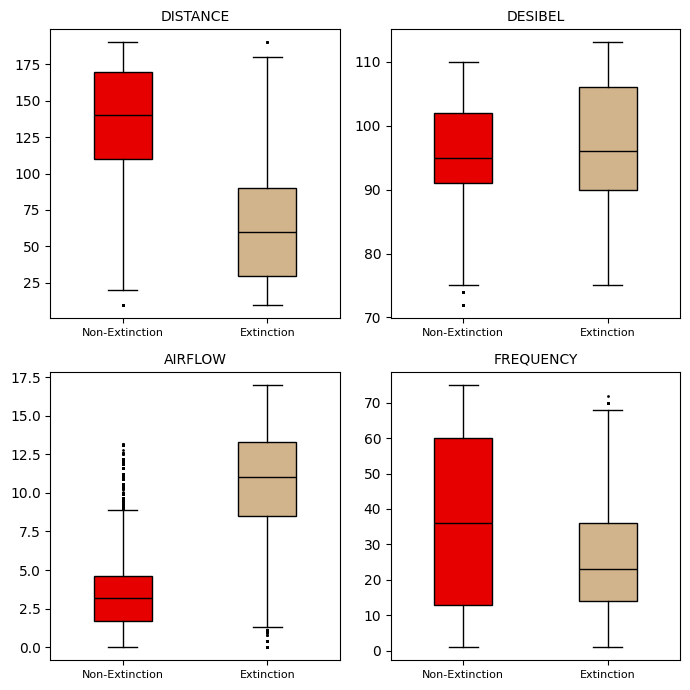

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7)) 

colors = ['#E60000', '#D2B48C']
variables = ["DISTANCE", "DESIBEL", "AIRFLOW", "FREQUENCY"]


for i, ax in enumerate(axes.flatten()):
    var = variables[i]  
    class_categories = data["STATUS"].unique()
    
    data_to_plot = [data[data["STATUS"] == category][var] for category in class_categories]

    boxplots = ax.boxplot(
        data_to_plot,
        patch_artist=True,
        widths=0.4,
        boxprops=dict(color='black'),
        medianprops=dict(color='black'),
        flierprops=dict(marker='o', color='black', markersize=1),
        notch=False
    )

    
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    ax.set_title(var, fontsize=10)
    ax.set_xticklabels(["Non-Extinction", "Extinction"], fontsize=8)

plt.tight_layout()
plt.show()

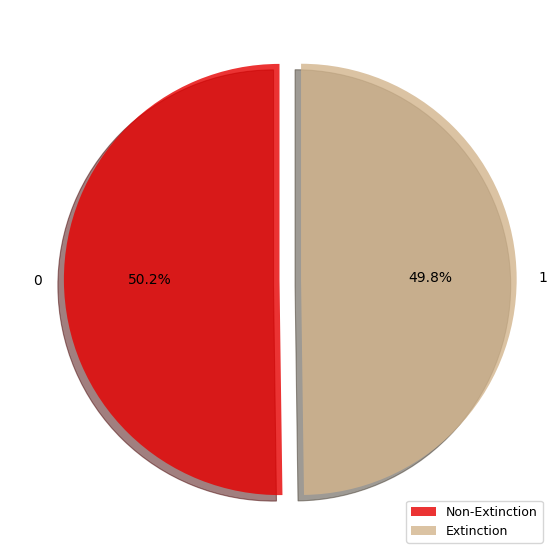

In [11]:
plt.figure(figsize=(7,7))

explode= [0,0.1]
colors=['#E60000', '#D2B48C']
labels=['0','1']
sizes = np.array([data['STATUS'].value_counts().iloc[0],data['STATUS'].value_counts().iloc[1]])   

plt.pie(sizes, shadow=True, explode=explode, startangle=90, labels=labels,autopct='%1.1f%%',
        colors=colors, wedgeprops={'alpha':0.80, 'linewidth':0.8})
plt.legend(['Non-Extinction', 'Extinction'], fontsize=9, loc='lower right')

plt.show()